In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the dataset:

In [2]:
col=['name','online_order','book_table','rate','votes','location','rest_type','dish_liked','cuisines','approx_cost(for two people)','reviews_list','listed_in(type)','listed_in(city)']
data=pd.read_csv('zomato.csv',usecols=col)
df=pd.DataFrame(data)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

# Data Cleaning:

In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df['rate']=df['rate'].str.replace('/5','')


In [9]:
df['rate']=df['rate'].str.replace('NEW','0')

In [10]:
df['rate']=df['rate'].str.replace(',','')

In [11]:
df['rate'].replace('', pd.NA, inplace=True)

In [12]:
df['rate']=df['rate'].astype(float)

In [40]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 0. , 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [42]:
df['rate'].dtype

dtype('float64')

In [13]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [14]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [15]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [16]:
df['approx_cost(for one people)']=df['approx_cost(for two people)']/2

In [19]:
df['approx_cost(for one people)'].describe()

count    23406.000000
mean       377.589934
std        260.207528
min         20.000000
25%        200.000000
50%        300.000000
75%        500.000000
max       3000.000000
Name: approx_cost(for one people), dtype: float64

In [20]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),approx_cost(for one people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,400.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,400.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,400.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,150.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,600.0
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,1000.0
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,600.0
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,400.0


In [21]:
# seperating hotels based on cost 

def cost_category(cost):
    if cost <=500:
        return 'Low'
    elif cost > 500 and cost <= 1500:
        return 'Medium'
    else:
        return 'High'

df['cost_category'] = df['approx_cost(for one people)'].apply(cost_category)

# removing the duplicate :

In [22]:
df.duplicated().sum()

12

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

#  Restaurant Type Distribution Plot:


In [25]:
dict = {}

for i in df['rest_type'].unique():
    a=i.split(', ')
    for j in a:
        j=j.lstrip(' ')
        if j in dict:
            dict[j] = dict[j] + 1
        else:
            dict[j] = 1
print(dict)

{'Casual Dining': 14, 'Cafe': 14, 'Quick Bites': 14, 'Delivery': 2, 'Dessert Parlor': 10, 'Pub': 8, 'Beverage Shop': 6, 'Bar': 11, 'Takeaway': 2, 'Food Truck': 1, 'Bakery': 7, 'Sweet Shop': 3, 'Microbrewery': 9, 'Lounge': 10, 'Food Court': 4, 'Kiosk': 2, 'Mess': 1, 'Club': 2, 'Fine Dining': 4, 'Irani Cafee': 1, 'Dhaba': 1}


In [26]:
restaurant=dict.keys()
freq=dict.values()

In [27]:
restaurant

dict_keys(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar', 'Takeaway', 'Food Truck', 'Bakery', 'Sweet Shop', 'Microbrewery', 'Lounge', 'Food Court', 'Kiosk', 'Mess', 'Club', 'Fine Dining', 'Irani Cafee', 'Dhaba'])

In [28]:
freq


dict_values([14, 14, 14, 2, 10, 8, 6, 11, 2, 1, 7, 3, 9, 10, 4, 2, 1, 2, 4, 1, 1])

In [29]:
df_res_type=pd.DataFrame()
df_res_type['type']=restaurant
df_res_type['count']=freq

In [30]:
df_res_type

,type,count
0,Casual Dining,14
1,Cafe,14
2,Quick Bites,14
3,Delivery,2
4,Dessert Parlor,10
5,Pub,8
6,Beverage Shop,6
7,Bar,11
8,Takeaway,2
9,Food Truck,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'Cafe'),
  Text(2, 0, 'Quick Bites'),
  Text(3, 0, 'Delivery'),
  Text(4, 0, 'Dessert Parlor'),
  Text(5, 0, 'Pub'),
  Text(6, 0, 'Beverage Shop'),
  Text(7, 0, 'Bar'),
  Text(8, 0, 'Takeaway'),
  Text(9, 0, 'Food Truck'),
  Text(10, 0, 'Bakery'),
  Text(11, 0, 'Sweet Shop'),
  Text(12, 0, 'Microbrewery'),
  Text(13, 0, 'Lounge'),
  Text(14, 0, 'Food Court'),
  Text(15, 0, 'Kiosk'),
  Text(16, 0, 'Mess'),
  Text(17, 0, 'Club'),
  Text(18, 0, 'Fine Dining'),
  Text(19, 0, 'Irani Cafee'),
  Text(20, 0, 'Dhaba')])

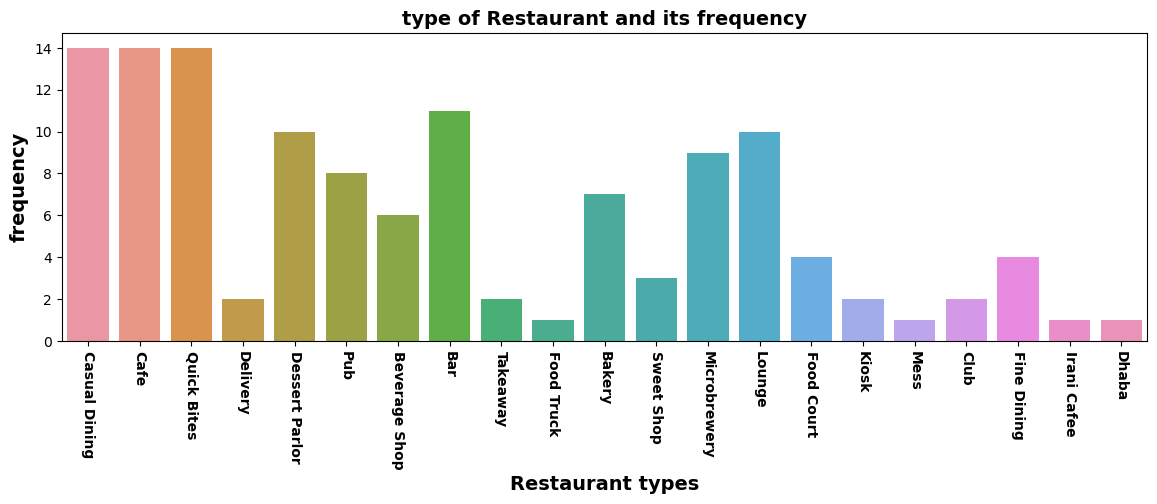

In [31]:
plt.figure(figsize=(14, 4))
sns.barplot(x = df_res_type['type'], y = df_res_type['count'], data = df_res_type)
plt.title("type of Restaurant and its frequency", 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Restaurant types', fontsize = 14, fontweight = 'bold')
plt.ylabel('frequency', fontsize = 14, fontweight = 'bold')

plt.xticks(rotation = -90, fontsize = 10, fontweight = 'bold')

# Is there a relation between online order option and rating of the restaurant



In [32]:
df.groupby('online_order')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
online_order,,,,,,,,
No,6956.0,3.881627,0.643015,0.0,3.8,4.0,4.2,4.9
Yes,16438.0,3.881062,0.466333,0.0,3.8,3.9,4.1,4.9


In [33]:
rating_order=round(df.groupby('online_order')['rate'].mean().reset_index(),2)

In [35]:
rating_order=pd.DataFrame(rating_order)
rating_order

,online_order,rate
0,No,3.88
1,Yes,3.88


<Axes: xlabel='online_order', ylabel='rate'>

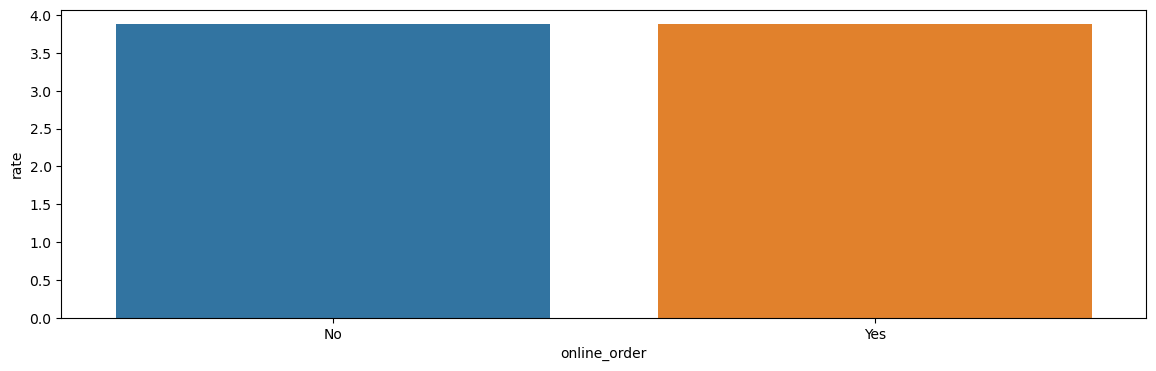

In [36]:
plt.figure(figsize=(14, 4))
sns.barplot(x =rating_order['online_order'], y = rating_order['rate'], data = rating_order)


# conclusion

there is no relation between online order option and rating of the
restaurant

# Is there a relation between Table booking option and rating of the restaurant


In [37]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df.groupby('book_table')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
book_table,,,,,,,,
No,17256.0,3.80146,0.489429,0.0,3.7,3.9,4.1,4.9
Yes,6138.0,4.10549,0.556178,0.0,4.0,4.2,4.3,4.9


In [39]:
book_table_rating=round(df.groupby('book_table')['rate'].mean().reset_index(),2)

In [40]:
book_table_rating

,book_table,rate
0,No,3.80
1,Yes,4.11


<Axes: xlabel='book_table', ylabel='rate'>

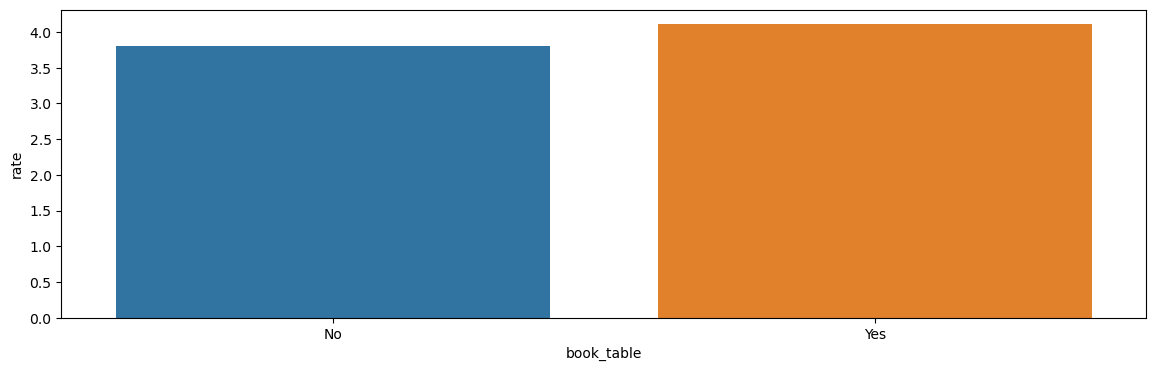

In [41]:
plt.figure(figsize=(14, 4))
sns.barplot(x =book_table_rating['book_table'], y = book_table_rating['rate'], data = book_table_rating)


# conclusion
there is  relation between Table booking option and rating of the restaurant

the rating of the book_table is 4.1 and the raring of the non booking table is 3.8 


# Cost Distribution of all the restaurants in city

<Axes: xlabel='approx_cost(for one people)', ylabel='Count'>

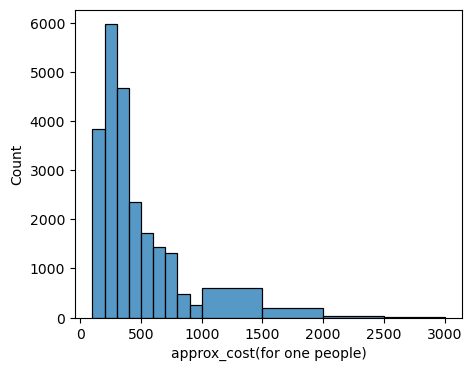

In [100]:
plt.figure(figsize=(5,4))
sns.histplot(df['approx_cost(for one people)'],bins=[100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000])

In [43]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),approx_cost(for one people),cost_category
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,400.0,Low
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,400.0,Low
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,400.0,Low
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,150.0,Low
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,300.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,600.0,Medium
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,1000.0,Medium
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,600.0,Medium
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,400.0,Low


In [44]:
df.groupby(['listed_in(city)','location'])['approx_cost(for one people)'].sum()

listed_in(city)  location                     
BTM              BTM                               84715.0
                 Bannerghatta Road                 23175.0
                 Bommanahalli                       1250.0
                 Ejipura                             300.0
                 HSR                               33325.0
                                                    ...   
Whitefield       ITPL Main Road, Whitefield        10375.0
                 KR Puram                            150.0
                 Marathahalli                        350.0
                 Varthur Main Road, Whitefield       950.0
                 Whitefield                       237825.0
Name: approx_cost(for one people), Length: 476, dtype: float64

 # Finding the best cheap restaurants:

In [83]:
best_cheapest=df[(df['approx_cost(for one people)']< 500) &(df['rate']>4.5)]
best_cheapest

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),approx_cost(for one people),cost_category
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,300.0,Low
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Delivery,Banashankari,300.0,Low
164,The Blue Wagon - Kitchen,Yes,No,4.6,228,Jayanagar,Cafe,"Pizza, Nachos, Garlic Maggi, Burgers, Cheese M...","Cafe, Beverages",400,"[('Rated 5.0', ""RATED\n I've been binging on ...",Delivery,Banashankari,200.0,Low
557,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Dine-out,Banashankari,300.0,Low
632,Taaza Thindi,No,No,4.7,651,Banashankari,Quick Bites,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",South Indian,100,"[('Rated 5.0', 'RATED\n One of the cleanest s...",Dine-out,Banashankari,50.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46630,O.G. Variar & Sons,No,No,4.8,1161,Rajajinagar,Bakery,"Veg Puff, Plum Cake, Sponge Cake, Tea, Coconut...","Bakery, Desserts",200,"[('Rated 5.0', ""RATED\n This place has a lega...",Desserts,Rajajinagar,100.0,Low
46973,CTR,Yes,No,4.8,4421,Malleshwaram,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150,"[('Rated 5.0', 'RATED\n Extremely crowded pla...",Dine-out,Rajajinagar,75.0,Low
47409,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 4.0', ""RATED\n Looks like there's a ...",Delivery,Residency Road,200.0,Low
47987,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 4.0', ""RATED\n Looks like there's a ...",Desserts,Residency Road,200.0,Low


In [46]:
best_cheapest=best_cheapest.groupby('name')['votes'].max()

In [47]:
best_cheapest=best_cheapest.reset_index()

In [48]:
best_cheapest=best_cheapest.sort_values(by = 'votes', ascending = False).head(5)

In [49]:
best_cheapest

,name,votes
22,Truffles,14726
20,The Hole in the Wall Cafe,7137
5,CTR,4421
8,ECHOES Koramangala,3220
16,Onesta,2906


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Truffles'),
  Text(1, 0, 'The Hole in the Wall Cafe'),
  Text(2, 0, 'CTR'),
  Text(3, 0, 'ECHOES Koramangala'),
  Text(4, 0, 'Onesta')])

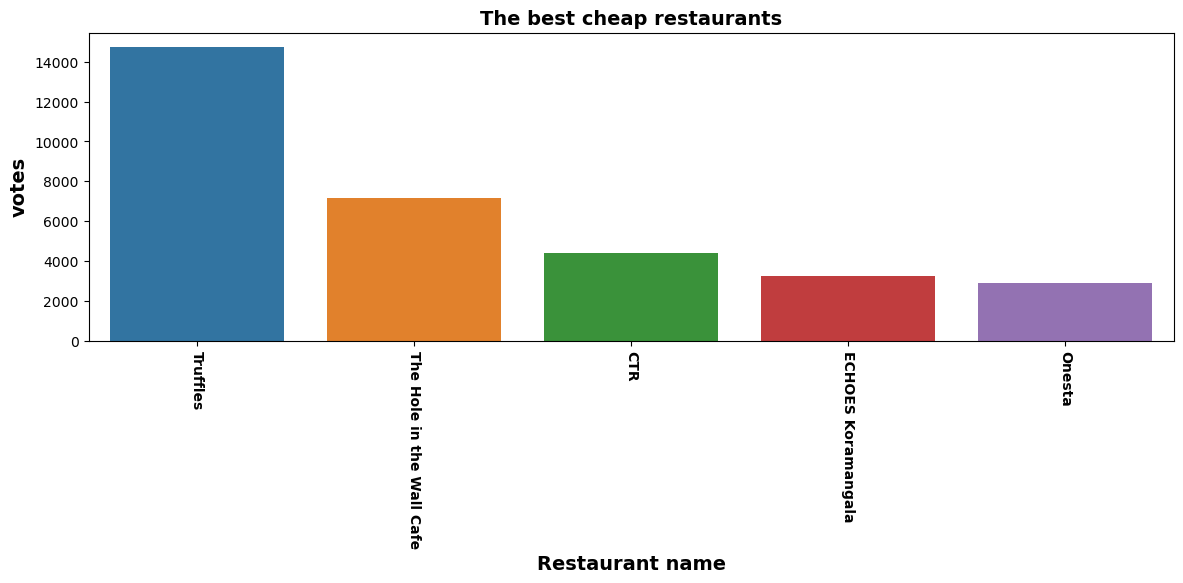

In [50]:
plt.figure(figsize=(14, 4))
sns.barplot(x =best_cheapest ['name'], y = best_cheapest['votes'], data = df_res_type)
plt.title("The best cheap restaurants", 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Restaurant name', fontsize = 14, fontweight = 'bold')
plt.ylabel('votes', fontsize = 14, fontweight = 'bold')

plt.xticks(rotation = -90, fontsize = 10, fontweight = 'bold')

# conclusion

The top five cheapest's and more voted  restaurants name's are Truffles,The Hole in the Wall Caf,CTR,ECHOES Koramangala,Onesta

Truffles was the top cheapest's and more voted  restaurants

# Find relationship

Is there a relation between cuisine, location and the cost?

In [85]:
cheapest=df[(df['approx_cost(for one people)']< 500) &(df['rate']>4.5)]
cheapest

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),approx_cost(for one people),cost_category
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,300.0,Low
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Delivery,Banashankari,300.0,Low
164,The Blue Wagon - Kitchen,Yes,No,4.6,228,Jayanagar,Cafe,"Pizza, Nachos, Garlic Maggi, Burgers, Cheese M...","Cafe, Beverages",400,"[('Rated 5.0', ""RATED\n I've been binging on ...",Delivery,Banashankari,200.0,Low
557,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Dine-out,Banashankari,300.0,Low
632,Taaza Thindi,No,No,4.7,651,Banashankari,Quick Bites,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",South Indian,100,"[('Rated 5.0', 'RATED\n One of the cleanest s...",Dine-out,Banashankari,50.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46630,O.G. Variar & Sons,No,No,4.8,1161,Rajajinagar,Bakery,"Veg Puff, Plum Cake, Sponge Cake, Tea, Coconut...","Bakery, Desserts",200,"[('Rated 5.0', ""RATED\n This place has a lega...",Desserts,Rajajinagar,100.0,Low
46973,CTR,Yes,No,4.8,4421,Malleshwaram,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150,"[('Rated 5.0', 'RATED\n Extremely crowded pla...",Dine-out,Rajajinagar,75.0,Low
47409,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 4.0', ""RATED\n Looks like there's a ...",Delivery,Residency Road,200.0,Low
47987,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 4.0', ""RATED\n Looks like there's a ...",Desserts,Residency Road,200.0,Low


In [88]:
relationship=cheapest.groupby(['cuisines','location'])['approx_cost(for one people)'].mean()
relationship=pd.DataFrame(relationship)
relationship 

approx_cost(for one people)
cuisines                                           location                                          
Bakery, Desserts                                   Rajajinagar                                100.000
Beverages, Desserts                                Marathahalli                               200.000
Biryani, Mughlai, Andhra                           Kalyan Nagar                               400.000
Cafe, American, Burger                             Koramangala 4th Block                      300.000
Cafe, American, Burger, Beverages                  HSR                                        375.000
Cafe, American, Burger, Steak                      Indiranagar                                450.000
                                                   Koramangala 5th Block                      450.000
                                                   New BEL Road                               450.000
Cafe, Beverages                                    Jayanagar                                  200.000
Cafe, Desserts, Continental                        Koramangala 7th Block                      275.000
Chinese, American, Continental, Italian, North ... Koramangala 5th Block                      375.000
Continental, Finger Food, Asian, Chinese           HSR                                        425.000
Desserts                                           Brigade Road                               200.000
                                                   Kalyan Nagar                               200.000
                                                   Koramangala 5th Block                      200.000
                                                   Vasanth Nagar                              200.000
                                                   Whitefield                                 200.000
Desserts, Bakery                                   Kalyan Nagar                               150.000
Desserts, Beverages                                Koramangala 1st Block                      150.000
                                                   Koramangala 5th Block                      200.000
Desserts, Cafe, Beverages                          Indiranagar                                450.000
Desserts, Continental                              Koramangala 7th Block                      275.000
Desserts, Fast Food                                Koramangala 5th Block                      195.000
Healthy Food, North Indian, Biryani, Continenta... BTM                                        250.000
                                                   Koramangala 5th Block                      250.000
Ice Cream, Beverages                               Indiranagar                                100.000
Ice Cream, Desserts                                Indiranagar                                159.375
                                                   Koramangala 5th Block                      200.000
Pizza, Cafe, Italian                               Banashankari                               300.000
                                                   Basavanagudi                               300.000
                                                   Marathahalli                               300.000
South Indian                                       Banashankari                                50.000
                                                   Basavanagudi                                50.000
                                                   Malleshwaram                                75.000

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Bakery, Desserts'),
  Text(1, 0, 'Beverages, Desserts'),
  Text(2, 0, 'Biryani, Mughlai, Andhra'),
  Text(3, 0, 'Cafe, American, Burger'),
  Text(4, 0, 'Cafe, American, Burger, Beverages'),
  Text(5, 0, 'Cafe, American, Burger, Steak'),
  Text(6, 0, 'Cafe, Beverages'),
  Text(7, 0, 'Cafe, Desserts, Continental'),
  Text(8, 0, 'Chinese, American, Continental, Italian, North Indian'),
  Text(9, 0, 'Continental, Finger Food, Asian, Chinese'),
  Text(10, 0, 'Desserts'),
  Text(11, 0, 'Desserts, Bakery'),
  Text(12, 0, 'Desserts, Beverages'),
  Text(13, 0, 'Desserts, Cafe, Beverages'),
  Text(14, 0, 'Desserts, Continental'),
  Text(15, 0, 'Desserts, Fast Food'),
  Text(16, 0, 'Healthy Food, North Indian, Biryani, Continental, Sandwich, Desserts'),
  Text(17, 0, 'Ice Cream, Beverages'),
  Text(18, 0, 'Ice Cream, Desserts'),
  Text(19, 0, 'Pizza, Cafe, Italian'),
  Text(20, 0, 'South Indian')])

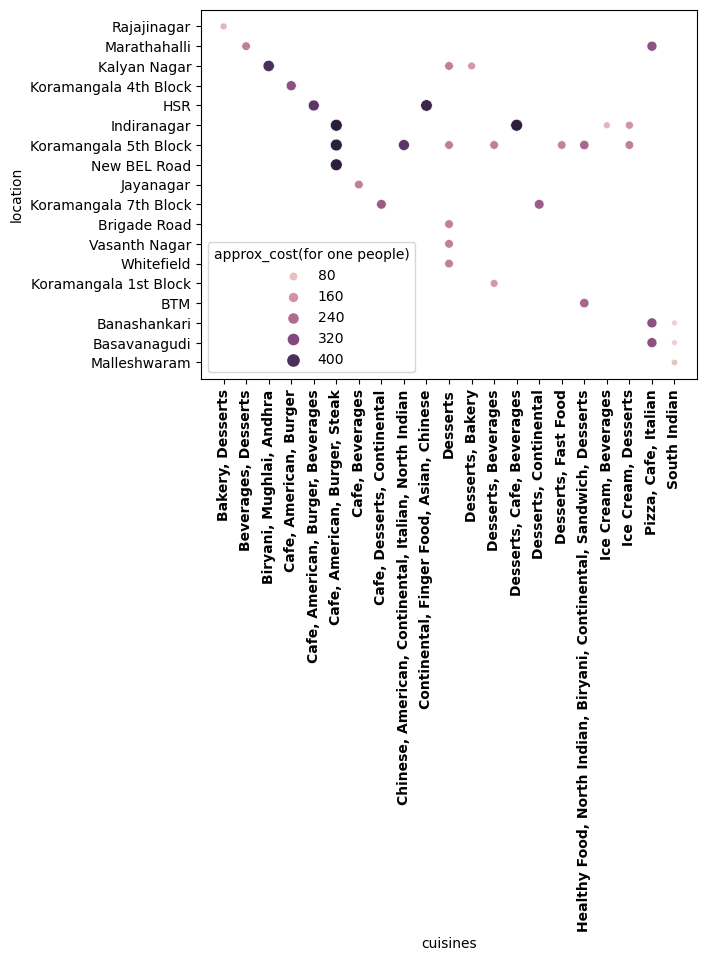

In [98]:
sns.scatterplot(x = 'cuisines', 
               y = 'location',
                size='approx_cost(for one people)',
               hue = 'Location', data = relationship)
plt.xticks(rotation = 90, fontsize = 10, fontweight = 'bold')


# Exploring the best expensive restaurants.

In [66]:
best_costly=df[(df['approx_cost(for one people)']>=1500) &(df['rate']>4.4)]
best_costly

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),approx_cost(for one people),cost_category
4983,Rim Naam - The Oberoi,No,No,4.6,979,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 5.0', ""RATED\n When lots of options ...",Buffet,Brigade Road,1500.0,Medium
6053,Rim Naam - The Oberoi,No,No,4.6,979,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 5.0', ""RATED\n When lots of options ...",Dine-out,Brigade Road,1500.0,Medium
6055,Karavalli - The Gateway Hotel,No,Yes,4.5,674,Residency Road,Fine Dining,"Appam, Fish, Sea Food, Cocktails, Prawn, Thali...","Mangalorean, Konkan, Seafood, Kerala",3500,"[('Rated 5.0', 'RATED\n The best restaurant f...",Dine-out,Brigade Road,1750.0,High
6104,Alba - JW Marriott Bengaluru,No,Yes,4.5,583,Lavelle Road,Fine Dining,"Pizza, Tiramisu, Pasta, Risotto, Lobster, Pann...",Italian,4000,"[('Rated 5.0', 'RATED\n So this Italian Resta...",Dine-out,Brigade Road,2000.0,High
11547,Rim Naam - The Oberoi,No,No,4.6,983,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 4.0', 'RATED\n Outstanding ambience ...",Buffet,Church Street,1500.0,Medium
12572,Rim Naam - The Oberoi,No,No,4.6,983,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 4.0', 'RATED\n Outstanding ambience ...",Dine-out,Church Street,1500.0,Medium
12574,Karavalli - The Gateway Hotel,No,Yes,4.5,675,Residency Road,Fine Dining,"Appam, Fish, Sea Food, Cocktails, Prawn, Thali...","Mangalorean, Konkan, Seafood, Kerala",3500,"[('Rated 5.0', 'RATED\n The best restaurant f...",Dine-out,Church Street,1750.0,High
17550,Rim Naam - The Oberoi,No,No,4.6,979,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 5.0', ""RATED\n When lots of options ...",Buffet,Indiranagar,1500.0,Medium
19118,Rim Naam - The Oberoi,No,No,4.6,979,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Wine,...",Thai,3000,"[('Rated 5.0', ""RATED\n When lots of options ...",Dine-out,Indiranagar,1500.0,Medium
37674,Rim Naam - The Oberoi,No,No,4.6,986,MG Road,Fine Dining,"Seafood Soup, Mocktails, Mushroom Salad, Thai ...",Thai,3000,"[('Rated 5.0', 'RATED\n If you are looking fo...",Buffet,Lavelle Road,1500.0,Medium


In [67]:
best_costly=best_costly.groupby('name')['votes'].max()
best_costly=best_costly.reset_index()
best_costly=best_costly.sort_values(by = 'votes', ascending = False).head(5)
best_costly

,name,votes
2,Rim Naam - The Oberoi,988
1,Karavalli - The Gateway Hotel,682
0,Alba - JW Marriott Bengaluru,583


(array([0, 1, 2]),
 [Text(0, 0, 'Rim Naam - The Oberoi'),
  Text(1, 0, 'Karavalli - The Gateway Hotel'),
  Text(2, 0, 'Alba - JW Marriott Bengaluru')])

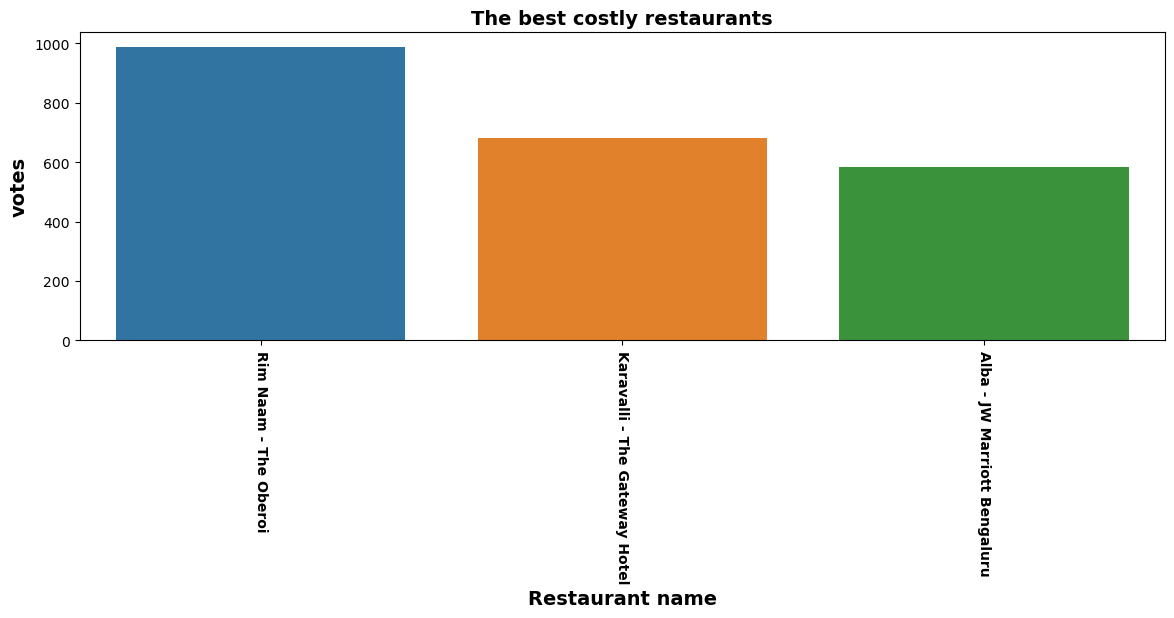

In [69]:
plt.figure(figsize=(14, 4))
sns.barplot(x =best_costly['name'], y = best_costly['votes'], data = best_costly)
plt.title("The best costly restaurants", 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Restaurant name', fontsize = 14, fontweight = 'bold')
plt.ylabel('votes', fontsize = 14, fontweight = 'bold')

plt.xticks(rotation = -90, fontsize = 10, fontweight = 'bold')

# conclusion

The top five expensive and more voted restaurants name's are Rim Naam - The Oberoi,Karavalli - The Gateway Hotel,Alba - JW Marriott Bengaluru are the top rated , more expensive  and more voted restaurants